## Traveling Salesman Problem using NN algorithm

### necessary imports

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

The TSP class requires two parameters: "points" and "starting_point". The "points" parameter can be a list or tuple containing numerical coordinates (x,y), or a dictionary with vertex labels and their corresponding numerical coordinates. The "starting_point" parameter can be either a numerical starting point within the range of the length of the list/tuple, or a label that matches a vertex in the passed dictionary.

The primary function of the TSP class is "nearest_neighbour". This function solves the TSP and returns a graph that visualizes the shortest path. Additionally, it provides a table with point labels, their coordinates, the shortest distances between points, and the nearest vertex to each given point. The function also displays point-to-point relations and the total travel cost.

In [64]:
class TSP():
    """
    A class to solve the traveling salesman problem (TSP) using the nearest neighbor algorithm.

    Args:
        points: A dictionary, list or tuple containing the coordinates (x,y) of numerical values
        starting_point: An optional parameter to specify the starting point for the algorithm. Can be a string 
                        name of a point (when points parameter is a dictionary and a key matches the name), 
                        or an integer representing the index of the starting point in the list or tuple.
                        Defaults to 0.

    Attributes:
        points: The validated points parameter
        starting_point: The validated starting_point parameter

    Methods:
        point_coordinates_validation: A method to validate the format of given coordinates - (x,y) of numerical values
        points_validation_preparation: A method to check if given data is in proper format: dictionary, list or tuple 
                                       containing coordinates (x,y) of numerical values
        generate_basic_table: A method to create a pandas dataframe to store data about points of graph, later used 
                              to work with the nearest neighbor algorithm
        generate_graph: A method to generate a graph based on the input table and starting point

    Returns:
        None.
    """
    def __init__(self,points,starting_point=0):
        #check if given points are valid coordinates
        if self.points_validation_preparation(points):
            self.points = points
            
        #verify if starting point matches given vertex names
        
        #if given starting point is string it can match only passed dictionary keys, because
        #tuple or list can't have any mapped names
        if type(starting_point) == str:
            if type(self.points) == dict:
                if starting_point in self.points.keys():
                    self.starting_point = starting_point
                else:
                    raise ValueError("Given starting point doesn't match any exiting points")
            else:
                raise ValueError("String starting point name can be applied only to dictionary containing that point name as key ")
        #if given starting point is integer it can match list, tuple and dictionary
        #because tuple and list have automatically genreated vertex names from range 0 to length of given list or tuple
        #and dictionary can have keys of integers
        elif type(starting_point) == int:
            if type(self.points) == dict:
                if starting_point in self.points.keys():
                    self.starting_point = starting_point
                else:
                    raise ValueError("Given starting point doesn't match any exiting points")
            if type(self.points) in (list,tuple):
                #check if starting_point is in range of list/tuple length
                if starting_point in range(len(self.points)):
                    self.starting_point = starting_point
            self.starting_point = starting_point


    # validate format of given coordinates - (x,y) of numerical values
    def point_coordinates_validation(self,points_coordinates):
        """
        A method to validate the format of given coordinates - (x,y) of numerical values.

        Args:
            points_coordinates: A list of coordinate tuples.

        Returns:
            A boolean value indicating whether the coordinates are in the proper format or not.
        """
        for coordinate in points_coordinates:
            # each point coordinate must have a length of 2
            if len(coordinate) != 2:
                return False

            # each value in coordinate must be numeric
            for value in coordinate:
                if not isinstance(value, (float, int)):
                    return False

        return True


    # check if given data is in propper format: dictionary, list or tuple containing coordinates (x,y) of numerical values
    def points_validation_preparation(self,points=None):
        """
        A method to check if given data is in proper format: dictionary, list or tuple containing coordinates (x,y) of numerical values.

        Args:
            points: An optional parameter to provide the data for validation. Defaults to None.

        Returns:
            A dictionary containing the labels, x and y values extracted from the input points data, if it is in the correct format.
            Raises a ValueError if the format is incorrect.
        """
        if points:
            points = points
        else:
            points = self.points
        # this function is supossed to take only dictionary, tuple or list as paremeter
        # which should contain coordinates like (x, y) format
        if isinstance(points, (dict, tuple, list)):
            # there is no point to search for shortest path when there are less than 3 points
            if len(points) > 2:
                # implementation differs a little  when input is dictionary vs when input is list or tuple
                if isinstance(points, dict):
                    # extract values of dictionary and verify if these are valid coordinates
                    if self.point_coordinates_validation(points.values()):
                        # assign x and y values extracted from coordinates
                        x_values = [x[0] for x in points.values()]
                        y_values = [y[1] for y in points.values()]
                        # in this case labels of points are keys of dictionary
                        points_labels = points.keys()
                    else:
                        raise ValueError("Invalid point coordinates: must be a tuple or list of two numeric values (x, y)")

                elif isinstance(points, (tuple, list)):
                    # verify if given coordinates are in valid format
                    if self.point_coordinates_validation(points):
                        # assign x and y values extracted from coordinates
                        x_values = [x[0] for x in points]
                        y_values = [y[1] for y in points]
                        # in this case labels of points are generates numbers in range of given tuple or list
                        points_labels = list(range(len(points)))
                    else:
                        raise ValueError("Invalid point coordinates: must be a tuple or list of two numeric values (x, y)")
                return {"labels": points_labels, "x": x_values, "y": y_values}


            else:
                raise ValueError("Nearest neighbor algorithm requires at least three points")

        else:
            raise TypeError("Expected parameter is dictionary, tuple or list")

        # create pandas dataframe to store data about points of graph


    # latter used to work with nearest neighbour algorithm
    def generate_basic_table(self,points=None):
        """
        A method to create a pandas dataframe to store data about points of graph, later used 
        to work with the nearest neighbor algorithm.

        Args:
            points: An optional parameter to provide the points data. Defaults to None.

        Returns:
            A pandas dataframe containing the labels, x and y values extracted from the input points data.
        """
        #check if any explicit parameters were passed if not use these from class constructor
        if points:
            points = points
        else:
            points=self.points
        # check if given data is in propper format: dictionary, list or tuple containing coordinates (x,y) of numerical values
        data = self.points_validation_preparation(points)
        # create table template
        table = pd.DataFrame(columns=["shortest path", "previous vertex"])
        # set vertex names to points lables
        table["vertex"] = data["labels"]
        table["vertex"] = table["vertex"].astype("string")
        # set position of x and y on the graph
        table["position_x"] = data["x"]
        table["position_y"] = data["y"]
        # fill shortest path with 999 to indicate infitiy, it will be used later with nearest neighbour algorithm
        table["shortest path"].fillna(999, inplace=True)
        # set vertex to index for convenience
        table.set_index("vertex", inplace=True)
        # change order of the columns
        table = table[["position_x", "position_y", "shortest path", "previous vertex"]]
        return table


    def generate_graph(self,table=None, starting_point=None):
        """
        A method to generate a graph based on the input table and starting point.

        Args:
            starting_point: An optional parameter to specify the starting point for the algorithm. Can be a string 
                            name of a point (when points parameter is a dictionary and a key matches the name), 
                            or an integer representing the index of the starting point in the list or tuple.
                            Defaults to None.

        Returns:
            A matplotlib graph.
        """
        #check if any explicit parameters were passed if not use these from class constructor
        if isinstance(table,pd.DataFrame):
            table=table
        else:
            table = self.generate_basic_table()

        if starting_point:
            starting_point = starting_point
        else:
            starting_point = self.starting_point

        # check if input is pandas dataframe
        if isinstance(table, pd.DataFrame):
            # required input is previously generated basic table so function will continnue only
            # if variables can be assignet to it's columns
            try:
                x = table["position_x"]
                y = table["position_y"]
                is_solved_count = table["previous vertex"].isna().sum()
            except KeyError:
                print("generate_graph takes table returned from generate_basic_table function as parameter")
            else:

                # ploting scatter ploth with given points
                plt.scatter(x, y)

                # optionally we can set starting point
                # if condition checks 2 things, if start_point was set and if it exists in the table
                if starting_point and starting_point in table.index:
                    # retrive information of starting point
                    start = table.loc[starting_point]
                    # assign it's x and y values to variables
                    x_start = start["position_x"]
                    y_start = start["position_y"]
                    # make it outstanding by setting color to green
                    plt.scatter(x_start, y_start, color="green")

                # adding labels to each point on graph
                for i, txt in enumerate(table.index.to_list()):
                    plt.annotate(txt, (x[i], y[i]), xytext=(x[i] + 0.1, y[i] + 0.1))

                plt.xticks(np.arange(min(x), max(x) + 2, 1))
                plt.yticks(np.arange(min(y), max(y) + 3, 1))
                
                #if passed table has all previous_vertex column filled it means that
                #TSP was solved and we can display its result on graph
                if is_solved_count == 0:

                    connect1 = table.loc[starting_point]

                    connect2 = table.loc[connect1["previous vertex"]]

                    connect1_x = connect1["position_x"]
                    connect2_x = connect2["position_x"]

                    connect1_y = connect1["position_y"]
                    connect2_y = connect2["position_y"]

                    plt.plot([connect1_x, connect2_x], [connect1_y, connect2_y])
                    for _ in range(table.shape[0] - 1):
                        connect1 = connect2
                        connect2 = table.loc[connect1["previous vertex"]]

                        connect1_x = connect1["position_x"]
                        connect2_x = connect2["position_x"]

                        connect1_y = connect1["position_y"]
                        connect2_y = connect2["position_y"]
                        plt.plot([connect1_x, connect2_x], [connect1_y, connect2_y])
                plt.show()
        else:
            raise ValueError("Function takes table returned from generate_basic_table function as parameter")


    def nearest_neighbour(self,table=None, starting_point=None):
        """
        A method to find the shortest path using the nearest neighbor algorithm.

        Args:
            Generated by generate_basic_table table or other valid pandas DataFrame table.

        Returns:
            Graph containing solved TSP
            Sequence of visited vertices and travel cost
            A tuple containing the shortest path and its length.
        """
        #check if any explicit parameters were passed if not use these from class constructor
        if table:
            table = table
        else:
            table = self.generate_basic_table()

        if starting_point:
            starting_point = starting_point
        else:
            starting_point = self.starting_point

        # define a helper function to calculate the Euclidean distance between two points
        def distance(x1, x2, y1, y2):
            return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

        # initialize the solution with the input table
        solution = table

        # set the current vertex to the starting point
        current_vertex = starting_point

        # get a list of all vertices in the solution
        unvisited_vertices = solution.index.to_list()

        # while there are still unvisited vertices
        while len(unvisited_vertices) > 1:

            # initialize the shortest path to a large value
            shortest_path = ("?", 999)

            # remove the current vertex from the list of unvisited vertices
            unvisited_vertices.remove(current_vertex)

            # for each unvisited vertex
            for vertex in unvisited_vertices:

                # get the coordinates of the current vertex and the vertex being tested
                current_x = solution.loc[current_vertex, "position_x"]
                current_y = solution.loc[current_vertex, "position_y"]
                tested_x = solution.loc[vertex, "position_x"]
                tested_y = solution.loc[vertex, "position_y"]

                # calculate the distance between the two vertices
                tested_path = distance(current_x, tested_x, current_y, tested_y)

                # if the distance is shorter than the current shortest path
                if tested_path < shortest_path[1]:
                    # update the shortest path to the new path
                    shortest_path = (vertex, tested_path)

            # set the current vertex to the vertex with the shortest path
            solution.loc[shortest_path[0], ["shortest path", "previous vertex"]] = [shortest_path[1], current_vertex]
            current_vertex = shortest_path[0]

        # calculate the distance from the last vertex back to the starting vertex
        back_to_start = solution.loc[starting_point]
        current_x = solution.loc[current_vertex, "position_x"]
        current_y = solution.loc[current_vertex, "position_y"]
        solution.loc[starting_point, ["shortest path", "previous vertex"]] = [
            distance(current_x, back_to_start["position_x"], current_y, back_to_start["position_y"]), current_vertex]

        # print the path and its cost
        start = solution.loc[solution["previous vertex"] == starting_point]
        print("Travel cost: ", end='')
        for _ in range(solution.shape[0] + 1):
            print(f'|{start["previous vertex"].values[0]}|->', end='')
            start = solution.loc[solution["previous vertex"] == start.index.values[0]]
        print(solution["shortest path"].sum())

        self.generate_graph(solution, starting_point)

        return solution

Example valid "points" inputs:

In [82]:
points = {"A": (2, 2), "B": (0, 5), "C": (8, 10), "D": (2, 9), "E": (3, 5), "F": (1, 10), "G": (7, 4)}
points2 = {"A":[2,2],"B":[0,5],"C":[8,10],"D":[4,4],"E":[3,5],"F":[11,10],"G":[3,4],"H":[9,3]}
points3 = {"Dog":(2,2),"123":(0,5),4:(8,10),"A":[4,3]}
points4 = ([2,4],[5,6],(1,8),(0,10),[5,5])

In [83]:
a = TSP(points,"F")
b = TSP(points2,"E")
c = TSP(points3,"A")
d = TSP(points4)
e = TSP(points4,3)

### Result of nearest_neighbour function:
### - Travel cost and point to point path
### - graph of actuall path
### - table describing all points, relations between them and shortest path between them

Travel cost: |F|->|D|->|E|->|B|->|A|->|G|->|C|->|F|->30.61079780088747


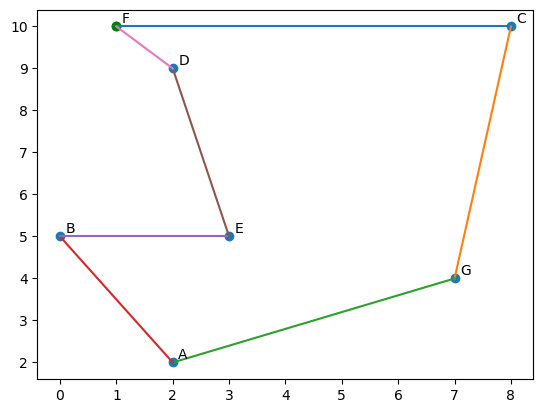

,position_x,position_y,shortest path,previous vertex
vertex,,,,
A,2,2,3.605551,B
B,0,5,3.000000,E
C,8,10,6.082763,G
D,2,9,1.414214,F
E,3,5,4.123106,D
F,1,10,7.000000,C
G,7,4,5.385165,A


In [84]:
a.nearest_neighbour()